In [19]:
from fktools import *
import tensorflow as tf
import sklearn
from dist_metric import DistributionOverlapSingle, DistributionOverlap

In [20]:
class Autoencoder(tf.keras.Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim

        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Input(shape=(8,)),
            tf.keras.layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
            tf.keras.layers.Dense(8, activation='softmax'),
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


latent_dim = 2
autoencoder = Autoencoder(latent_dim)

In [21]:
X = np.load("dataset_autoenc_3_X.npz", allow_pickle=True)['arr_0']
y = np.load("dataset_autoenc_3_y.npz", allow_pickle=True)['arr_0']

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.2)

print(f"X train size: {X_train.shape}")
print(f"X test size: {X_test.shape}")

X shape: (52592, 8)
y shape: (52592, 3)
X train size: (42073, 8)
X test size: (10519, 8)


In [22]:
autoencoder.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.KLDivergence(),
    metrics=[DistributionOverlap()]
)

history = autoencoder.fit(
    X_train, X_train,
    epochs=50,
    batch_size=32,
)

Epoch 1/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - dist_overlap: 0.6018 - loss: 0.5629
Epoch 2/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 656us/step - dist_overlap: 0.7328 - loss: 0.2628
Epoch 3/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - dist_overlap: 0.7678 - loss: 0.2046
Epoch 4/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 607us/step - dist_overlap: 0.7828 - loss: 0.1822
Epoch 5/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 582us/step - dist_overlap: 0.8085 - loss: 0.1515
Epoch 6/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 598us/step - dist_overlap: 0.8481 - loss: 0.1089
Epoch 7/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 601us/step - dist_overlap: 0.8825 - loss: 0.0754
Epoch 8/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 593us/step - dist_overlap: 0.8987 - loss: 0.0609
Epoch 9/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 589us/step - dist_overlap: 0.9056 - loss: 0.0552
Epoch 10/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 577us/step - dist_overlap: 0.9091 - loss: 0.0526
Epoch 11/50
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 1s 570us/step - 

In [23]:
loss = history.history['loss']
dist_overlap = history.history['dist_overlap']

epochs = range(1, len(loss) + 1)

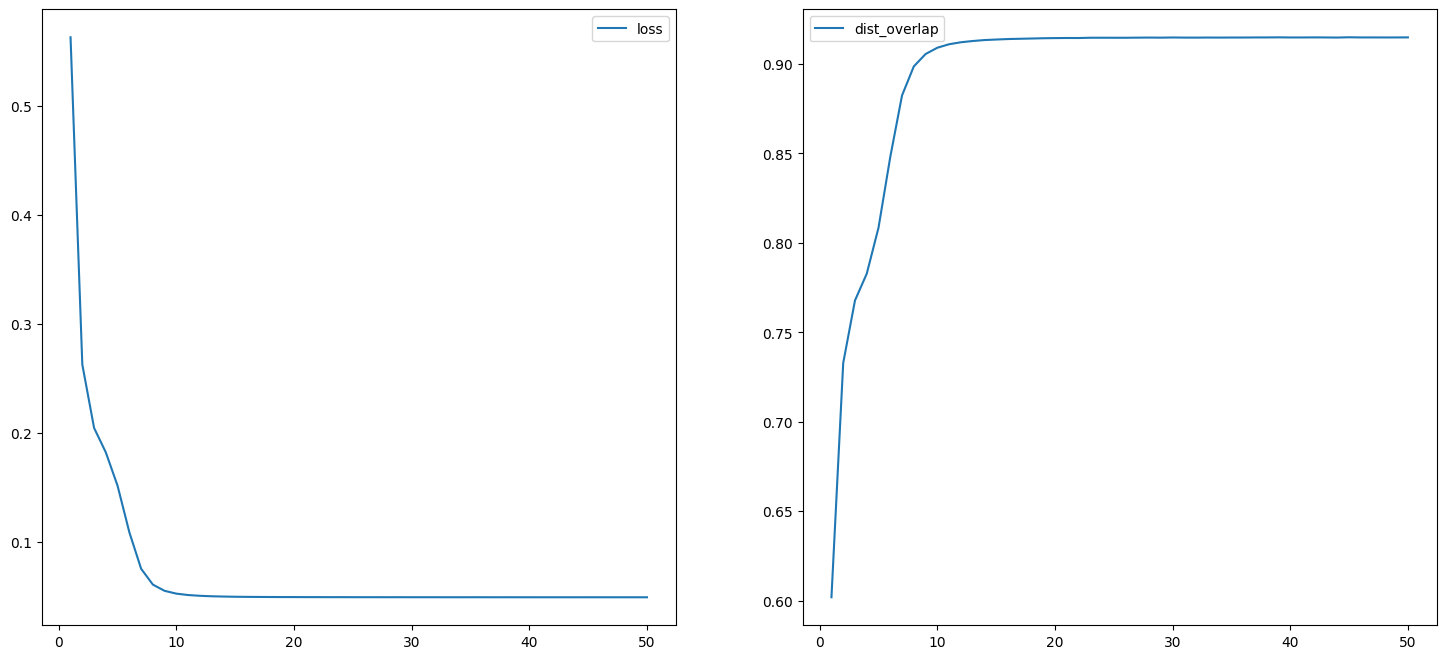

In [24]:
fig, ax = plt.subplots(ncols=2, figsize=(18,8))

ax[0].plot(epochs, loss, label="loss")
ax[0].legend()

ax[1].plot(epochs, dist_overlap, label="dist_overlap")
ax[1].legend()

329/329 ━━━━━━━━━━━━━━━━━━━━ 0s 670us/step


<BarContainer object of 8 artists>

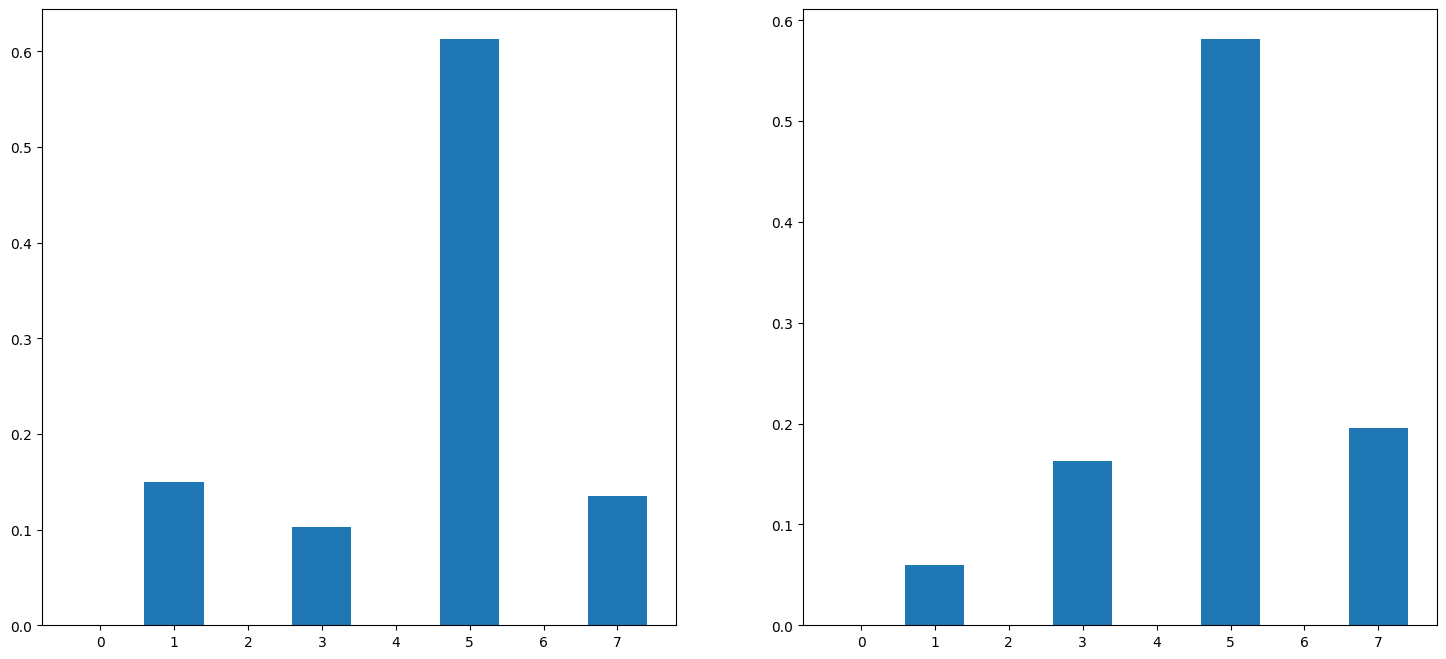

In [25]:
i = 1

pred = autoencoder.predict(X_test)

fig, ax = plt.subplots(ncols=2, figsize=(18,8))

ax[0].bar(np.arange(8), X_test[i])
ax[1].bar(np.arange(8), pred[i])

[[1.1903355e+01 1.8359046e+00]
 [1.2677318e+00 4.0475588e+00]
 [6.3803034e+00 8.6755753e-03]
 ...
 [4.2389226e-01 7.0364814e+00]
 [6.8303080e+00 1.8656734e+00]
 [1.0302186e+01 1.8836349e+00]]


Text(0.5, 1.0, 'autoencoder 8-2-8, encoded points')

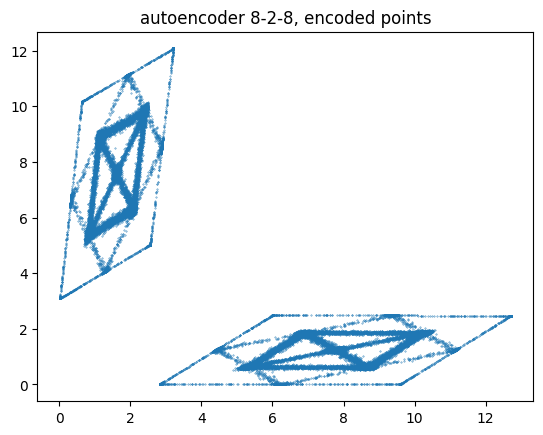

In [26]:
encoded_points = np.array(autoencoder.encoder(X))

print(encoded_points)

plt.scatter(encoded_points[:,0], encoded_points[:,1],s=0.1)
plt.title("autoencoder 8-2-8, encoded points")

In [27]:
print(tf.keras.losses.KLD(X_test, pred))
print(np.mean(tf.keras.losses.KLD(X_test, pred)))

tf.Tensor([0.04143576 0.0719109  0.00096716 ... 0.00038999 0.05691193 0.09230982], shape=(10519,), dtype=float32)
0.048852235


In [29]:
encoded_with_params = np.array(autoencoder.encoder(X))

encoded_with_params[:,0] /= np.max(encoded_with_params[:,0])
encoded_with_params[:,1] /= np.max(encoded_with_params[:,1])

Text(0.5, 1.0, 'color is number of steps')

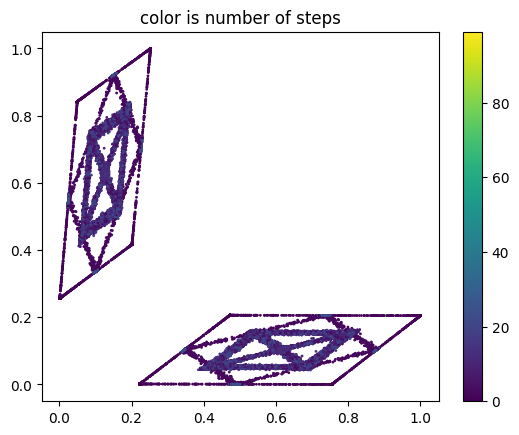

In [30]:
plt.scatter(encoded_with_params[:,0], encoded_with_params[:,1], s=1, c=y[:,0])
plt.colorbar()
plt.title("color is number of steps")

Text(0.5, 1.0, 'color is number of steps')

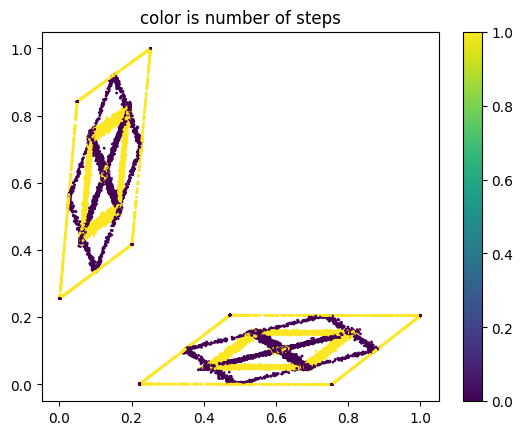

In [31]:
plt.scatter(encoded_with_params[:,0], encoded_with_params[:,1], s=1, c=y[:,0]%2)
plt.colorbar()
plt.title("color is number of steps")

Text(0.5, 1.0, 'color is start position')

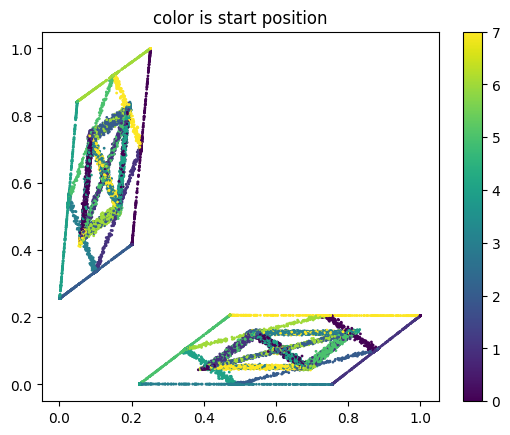

In [32]:
plt.scatter(encoded_with_params[:,0], encoded_with_params[:,1], s=1, c=y[:,1])
plt.colorbar()
plt.title("color is start position")

Text(0.5, 1.0, 'color is coin phase')

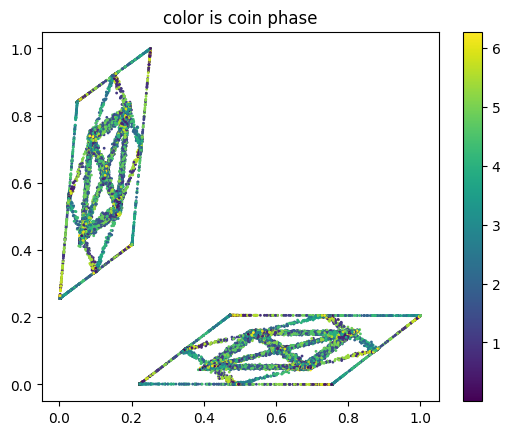

In [33]:
plt.scatter(encoded_with_params[:,0], encoded_with_params[:,1], s=1, c=y[:,2])
plt.colorbar()
plt.title("color is coin phase")

In [34]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(encoded_with_params)
print(pca.explained_variance_ratio_)

[0.89977    0.10023002]
